In [26]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import re

In [7]:
def load_and_describe(file_name):
    try:
        """Load The Data Set For Better Understanding"""
        data=pd.read_csv(file_name)
        print(f" Data Set {file_name} is Loaded Successfully\n")
        print(f"Dataset Head:\n")
        display(data.head())
        print(f"\n Basic Information\n")
        display(data.info())
        print(f"\n Data Statistics\n")
        display(data.describe())
        return data
    except Exception as e:
        print(f"Error Loading DataSet {e}")
        return None

In [10]:
data=load_and_describe('quotes.csv')

 Data Set quotes.csv is Loaded Successfully

Dataset Head:



,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"



 Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   100 non-null    object
 1   author  100 non-null    object
 2   tags    97 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB


None


 Data Statistics



,quote,author,tags
count,100,100,97
unique,100,50,83
top,“The world as we have created it is a process ...,Albert Einstein,love
freq,1,10,4


In [12]:
def clean_data(data):
    
    """Handle Missing values,duplicate value and outliers in the dataset""" 
    # Duplicate Value Treatment
    print("\nChecking For Duplicate Value")
    print(f"Duplicates Values:{data.duplicated().sum()}")
    data=data.drop_duplicates()
    print(f"Duplicates Removed ,Remaining Rows:{len(data)}")
    # Missing Value Treatment
    print(f"\nBlank Values:\n\n{round(data.isnull().sum()/len(data)*100,2)}")
    print(f"Unique Author: \n\n {data['author'].unique()}")

In [14]:
clean_data(data)


Checking For Duplicate Value
Duplicates Values:0
Duplicates Removed ,Remaining Rows:100

Blank Values:

quote     0.0
author    0.0
tags      3.0
dtype: float64
Unique Author: 

 ['Albert Einstein' 'J.K. Rowling' 'Jane Austen' 'Marilyn Monroe'
 'André Gide' 'Thomas A. Edison' 'Eleanor Roosevelt' 'Steve Martin'
 'Bob Marley' 'Dr. Seuss' 'Douglas Adams' 'Elie Wiesel'
 'Friedrich Nietzsche' 'Mark Twain' 'Allen Saunders' 'Pablo Neruda'
 'Ralph Waldo Emerson' 'Mother Teresa' 'Garrison Keillor' 'Jim Henson'
 'Charles M. Schulz' 'William Nicholson' 'Jorge Luis Borges'
 'George Eliot' 'George R.R. Martin' 'C.S. Lewis' 'Martin Luther King Jr.'
 'James Baldwin' 'Haruki Murakami' 'Alexandre Dumas fils'
 'Stephenie Meyer' 'Ernest Hemingway' 'Helen Keller' 'George Bernard Shaw'
 'Charles Bukowski' 'Suzanne Collins' 'J.R.R. Tolkien' 'Alfred Tennyson'
 'Terry Pratchett' 'J.D. Salinger' 'George Carlin' 'John Lennon'
 'W.C. Fields' 'Ayn Rand' 'Jimi Hendrix' 'J.M. Barrie' 'E.E. Cummings'
 'Khaled Hosse

## Bar chart of the top 10 most quoted authors.

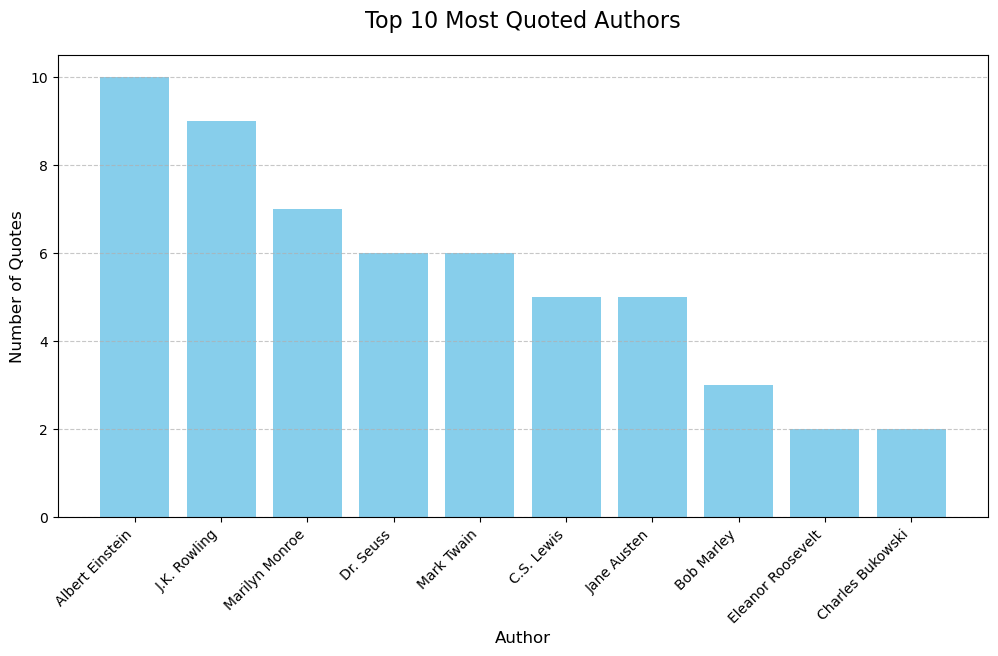

In [16]:
author_counts = data['author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(author_counts.index, author_counts.values, color='skyblue')
plt.title('Top 10 Most Quoted Authors', fontsize=16, pad=20)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Quotes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Word cloud of the most common words in the quotes.

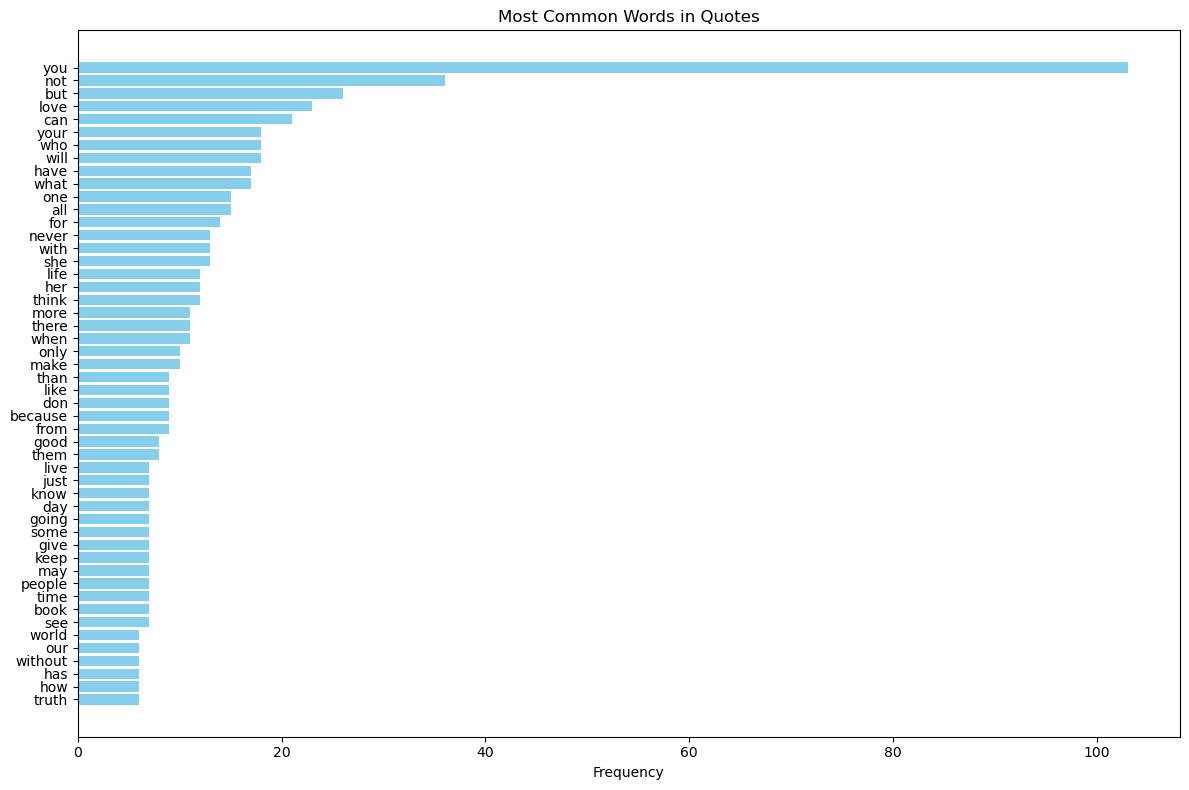

In [28]:
all_quotes = ' '.join(data['quote'].astype(str))
words = re.findall(r'\b\w{3,}\b', all_quotes.lower())  
word_counts = Counter(words)
stopwords = {'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'this', 'be', 'are'}
filtered_counts = {k:v for k,v in word_counts.items() if k not in stopwords}
top_words = dict(sorted(filtered_counts.items(), key=lambda x: -x[1])[:50])
plt.figure(figsize=(12,8))
plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
plt.gca().invert_yaxis()  # Highest counts at top
plt.title('Most Common Words in Quotes')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

## Pie chart showing the proportion of top 5 tags.

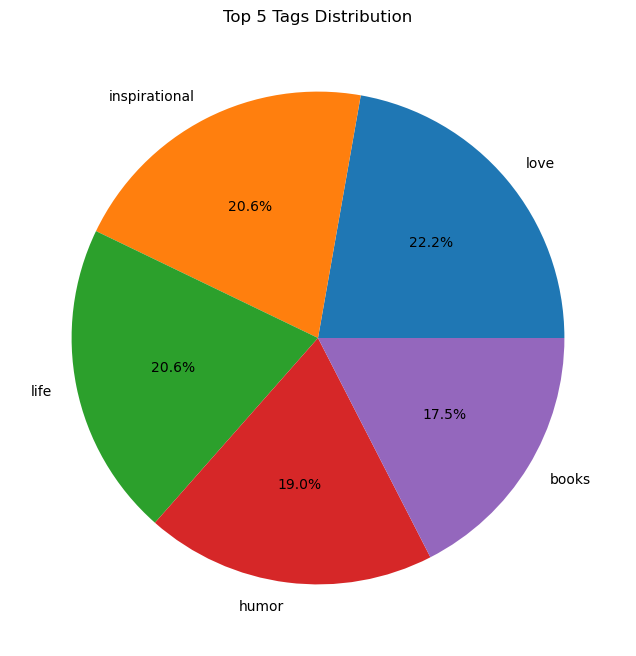

In [32]:
tags = data['tags'].str.split(',').explode().str.strip().value_counts().head(5)
plt.figure(figsize=(8, 8))
tags.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Tags Distribution')
plt.ylabel('') 
plt.show()

## Bar chart showing the Frequency of top 5 tags.

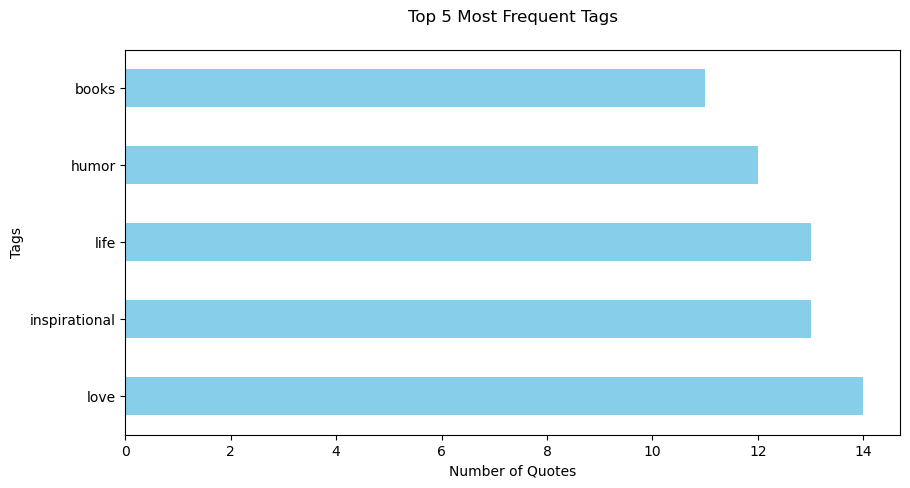

In [34]:
top_tags = data['tags'].str.split(',').explode().str.strip().value_counts().head(5)
plt.figure(figsize=(10,5))
top_tags.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Frequent Tags', pad=20)
plt.xlabel('Number of Quotes')
plt.ylabel('Tags')
plt.show()

##  Distribution of quote lengths for the top 5 most frequent authors

<Figure size 1000x600 with 0 Axes>

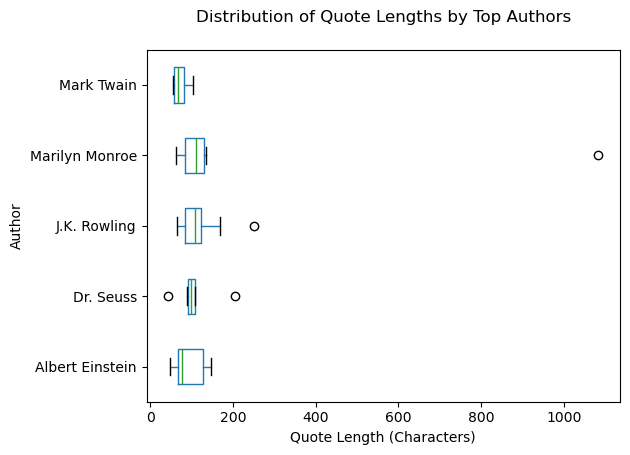

In [38]:
# Add quote length column
data['quote_length'] = data['quote'].str.len()

# Get top 5 authors
top_authors = data['author'].value_counts().head(5).index

#
plot_data = data[data['author'].isin(top_authors)]
plt.figure(figsize=(10,6))
plot_data.boxplot(column='quote_length', by='author', grid=False, vert=False)
plt.title('Distribution of Quote Lengths by Top Authors', pad=20)
plt.xlabel('Quote Length (Characters)')
plt.ylabel('Author')
plt.suptitle('') 
plt.tight_layout()
plt.show()